In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dec.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
inputs = df.drop(['Name','Embarked'],axis='columns')

inputs.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [4]:
inputs['sex_n']=le.fit_transform(inputs['Sex'])
inputs['ticket_n']=le.fit_transform(inputs['Ticket'])
inputs['cabin_n']=le.fit_transform(inputs['Cabin'])
inputs.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_n,ticket_n,cabin_n
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,1,523,147
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,596,81
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,669,147
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,49,55
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,1,472,147


In [5]:
inputs.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_n,ticket_n,cabin_n
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,1,523,147
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,596,81
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,669,147
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,49,55
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,1,472,147


In [6]:
inputs=inputs.drop(['Sex','Ticket','Cabin'],axis='columns')



In [7]:
inputs.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_n,ticket_n,cabin_n
0,1,0,3,22.0,1,0,7.2500,1,523,147
1,2,1,1,38.0,1,0,71.2833,0,596,81
2,3,1,3,26.0,0,0,7.9250,0,669,147
3,4,1,1,35.0,1,0,53.1000,0,49,55
4,5,0,3,35.0,0,0,8.0500,1,472,147


In [8]:
inputs.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
sex_n            0
ticket_n         0
cabin_n          0
dtype: int64

In [9]:
inputs.Age.fillna(inputs.Age.mean(),inplace=True)

In [10]:
inputs.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
sex_n          0
ticket_n       0
cabin_n        0
dtype: int64

In [11]:
inputs.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_n,ticket_n,cabin_n
0,1,0,3,22.0,1,0,7.2500,1,523,147
1,2,1,1,38.0,1,0,71.2833,0,596,81
2,3,1,3,26.0,0,0,7.9250,0,669,147
3,4,1,1,35.0,1,0,53.1000,0,49,55
4,5,0,3,35.0,0,0,8.0500,1,472,147


In [12]:
inputs=inputs.drop(['Pclass','Parch','Fare','ticket_n'],axis=1)


In [13]:
inputs.head()

,PassengerId,Survived,Age,SibSp,sex_n,cabin_n
0,1,0,22.0,1,1,147
1,2,1,38.0,1,0,81
2,3,1,26.0,0,0,147
3,4,1,35.0,1,0,55
4,5,0,35.0,0,1,147


In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs.drop(['Survived'],axis=1),inputs.Survived,test_size=0.2)

In [16]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
model.score(x_test,y_test)

0.7150837988826816

In [18]:
y=model.predict(inputs.drop(['Survived'],axis=1))

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(inputs.Survived,y)

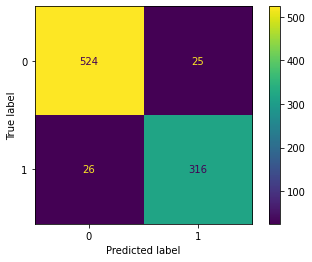

In [20]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()
plt.show()

In [23]:
plt.figure(figsize = (12, 8), dpi = 150)
plot_tree(model, filled = True, feature_names = x.columns)
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 1800x1200 with 0 Axes>